In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"D:\Codebase\Python\Data Cleaning\Data Clening Concepts\loan_data.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,NaN,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,NaN,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [3]:
dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mean(), inplace=True)

C:\Users\vadik\AppData\Local\Temp\ipykernel_15100\2117298730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mean(), inplace=True)


In [4]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,380.000000,370.000000,351.000000
mean,3579.845144,1280.636632,104.926316,340.864865,0.837607
std,1419.813818,2339.898481,28.371171,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,985.799988,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
dataset.shape

(381, 13)

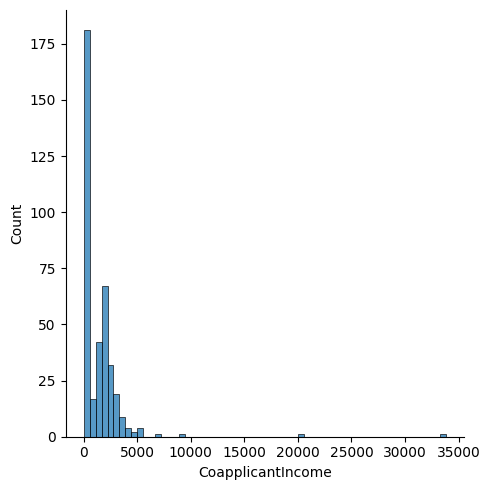

In [6]:
sns.displot(dataset["CoapplicantIncome"])
plt.show()

In [7]:
# We are Doing Outlier of Data
# But it is not nessary in Scaling
# You can Skip that Part

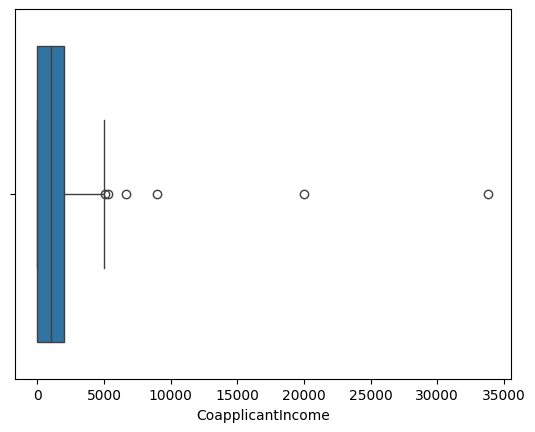

In [9]:
sns.boxplot(x="CoapplicantIncome", data=dataset)
plt.show()

In [11]:
# Using Z-score to remove Outlier

z_score = dataset['CoapplicantIncome'] - dataset['CoapplicantIncome'].mean() / dataset['CoapplicantIncome'].std()

In [16]:
dataset.drop(columns=["CoapplicantIncome"], inplace=True)
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,NaN,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,95.0,360.0,1.0,Urban,Y


In [17]:
dataset.insert(7, "CoapplicantIncome", z_score)
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1507.452696,NaN,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,1280.089327,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2357.452696,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,-0.547304,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1515.452696,95.0,360.0,1.0,Urban,Y


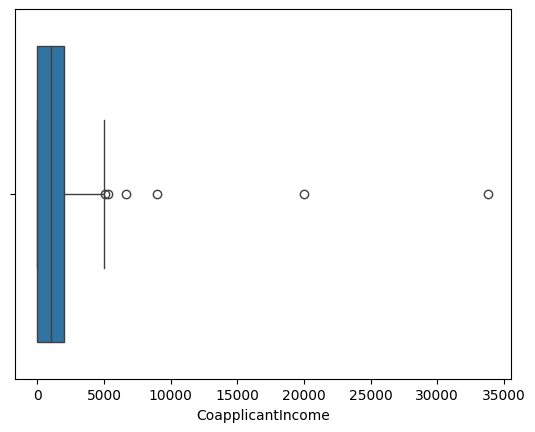

In [19]:
sns.boxplot(x="CoapplicantIncome", data=dataset)
plt.show()

In [21]:
# Outlier Removed

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
ms = MinMaxScaler()
ms.fit(dataset[["CoapplicantIncome"]])

MinMaxScaler()

In [26]:
dataset["CoapplicantIncome_MinMax"] = ms.transform(dataset[["CoapplicantIncome"]])

In [27]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_MinMax
0,LP001003,Male,Yes,1,Graduate,No,4583,1507.452696,NaN,360.0,1.0,Rural,N,0.044567
1,LP001005,Male,Yes,0,Graduate,Yes,3000,1280.089327,66.0,360.0,1.0,Urban,Y,0.037847
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2357.452696,120.0,360.0,1.0,Urban,Y,0.069687
3,LP001008,Male,No,0,Graduate,No,6000,-0.547304,141.0,360.0,1.0,Urban,Y,0.000000
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1515.452696,95.0,360.0,1.0,Urban,Y,0.044803


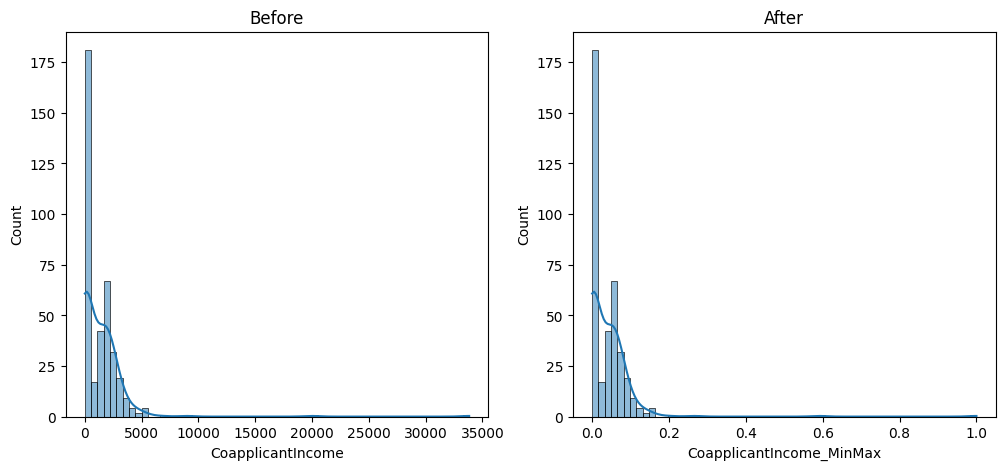

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Before")
sns.histplot(dataset["CoapplicantIncome"], kde=True)

plt.subplot(1, 2, 2)
plt.title("After")
sns.histplot(dataset["CoapplicantIncome_MinMax"], kde=True)

plt.show()